In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

df_main = pd.read_csv('titanic_prepared.csv')

X = df_main.drop(['label'], axis=1)
y = df_main['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Accuracy: 0.8704819277108434


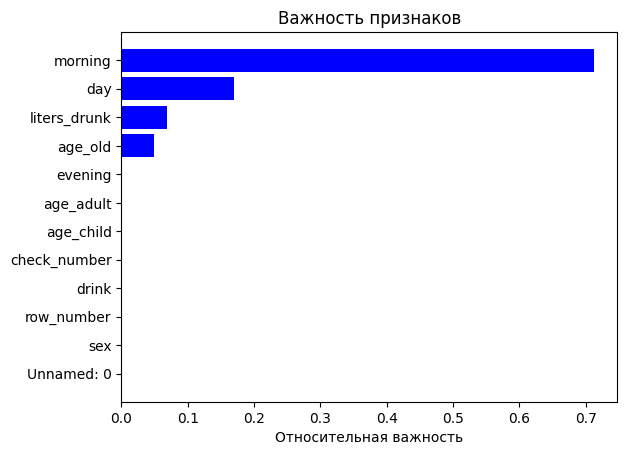

In [5]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

importances = model.feature_importances_
features = X_train.columns

indices = np.argsort(importances)

plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Относительная важность')
plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier

df_main = pd.read_csv('titanic_prepared.csv')

X = df_main[['morning', 'evening']]
y = df_main['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8704819277108434


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, n_jobs=4)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8704819277108434


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1, solver='lbfgs', max_iter=175)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8704819277108434


In [30]:
from collections import Counter
from sklearn.tree import DecisionTreeClassifier


class MyRandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, max_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []
        self.feature_indices = []

    def fit(self, X, y):
        self.trees = []
        self.feature_indices = []
        n_features = X.shape[1]

        if self.max_features is None:
            self.max_features = int(np.sqrt(n_features))

        for _ in range(self.n_trees):
            X_sample, y_sample, feature_idx = self._bootstrap_samples_and_features(X, y, n_features)
            tree = DecisionTreeClassifier(max_depth=self.max_depth, min_samples_split=self.min_samples_split, criterion='entropy')
            tree.fit(X_sample[:, feature_idx], y_sample)
            self.trees.append(tree)
            self.feature_indices.append(feature_idx)

    def _bootstrap_samples_and_features(self, X, y, n_features):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)

        # Randomly select subset of features (columns)
        feature_idx = np.random.choice(n_features, self.max_features, replace=False)

        X_sample = X[idxs]
        y_sample = y[idxs]
        return X_sample, y_sample, feature_idx

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = []
        for i, tree in enumerate(self.trees):
            feature_idx = self.feature_indices[i]
            tree_preds = tree.predict(X[:, feature_idx])
            predictions.append(tree_preds)

        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

In [31]:
from sklearn.datasets import load_digits

data = load_digits()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth= 5, criterion='entropy')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Decision tree accuracy:', accuracy)

model = MyRandomForest(n_trees=10, max_depth=5, max_features=X.shape[1] // 2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Random forest accuracy:', accuracy)

Decision tree accuracy: 0.8111111111111111
Random forest accuracy: 0.9166666666666666
